# 주성분 분석

<hr>

####**차원 축소**
 - dimensionally reduction
 - 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
 - 차원 축소는 저장 공간을 줄이고 시각화하기 쉬움
 - 다른 알고리즘의 성능을 높일 수 있음

####**주성분 분석**
 - PCA (Principal Component Analysis)
 - 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법
 - 이런 방향을 주성분이라고 부름
 - 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음
 - 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작음
 
####**설명된 분산**
 - Explained Variance
 - 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것
 - 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있음

<hr>

## PCA 클래스

### 1) 데이터 준비

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

### 2) 사이킷런의 PCA 클래스 객체 생성
 - k-평균과 마찬가지로 비지도 학습이므로 fir() 메서드에 타깃값을 제공하지 않는다

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

### 3) 주성분을 그림으로 출력

In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  # 샘플 개수
  n = len(arr)
  # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10)) # 올림 함수
  # 행이 1개면 열의 개수는 샘플의 개수. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()


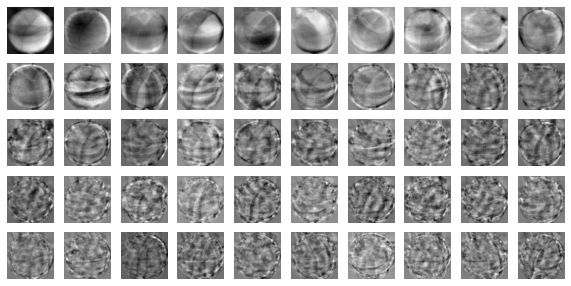

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

### 4) transform() 메서드를 사용해 원본 데이터의 차원 줄이기

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


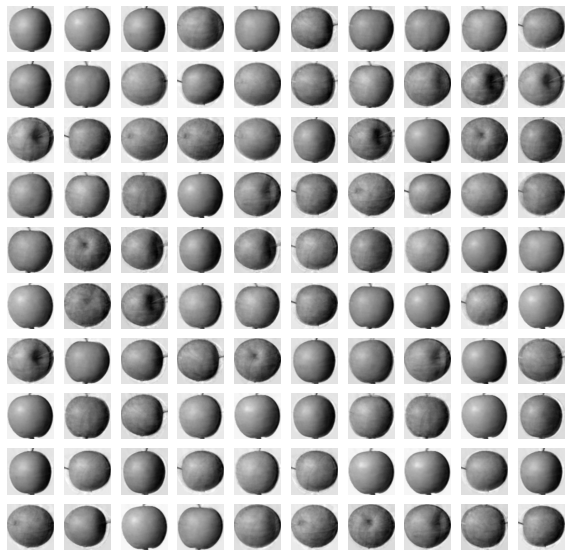

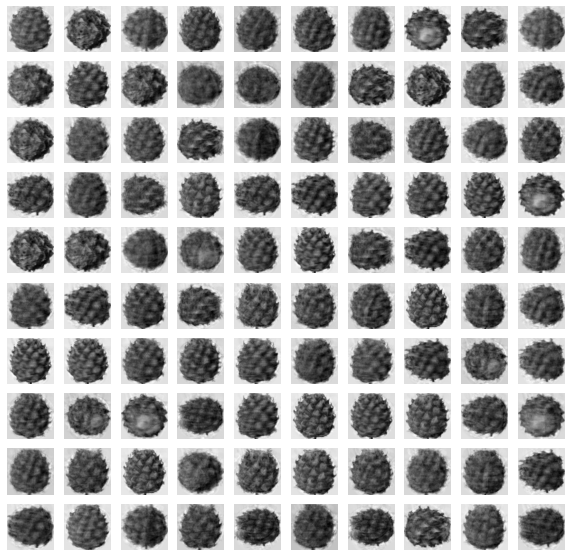

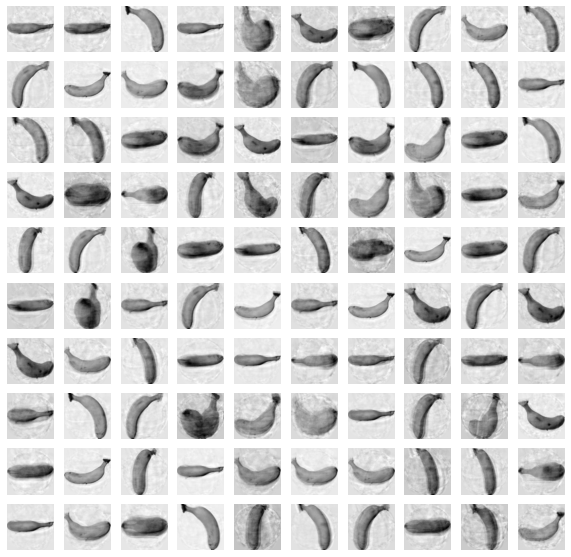

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산
 - PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율을 기록

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215737671277167


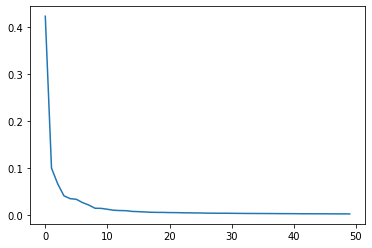

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용

### 로지스틱 회귀 모델

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

원본데이터로 교차검증 했을 때 점수

In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1449501514434814


PCA로 축소한 데이터로 교차검증 했을 때 점수

In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.024787187576293945


정확도는 100%이고 훈련 시간은 1.15초에서 0.02초로 감소했다

### 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 생성

In [22]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [23]:
print(pca.n_components)

0.5


In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용했을 때 교차 검증의 결과는?

In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.037791204452514646


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


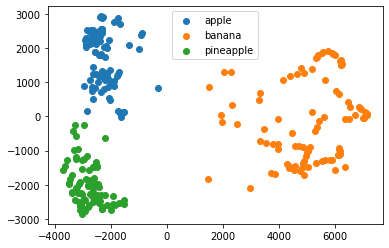

In [27]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

각 클러스터의 산점도가 잘 구분되어 있는 것을 볼 수 있다